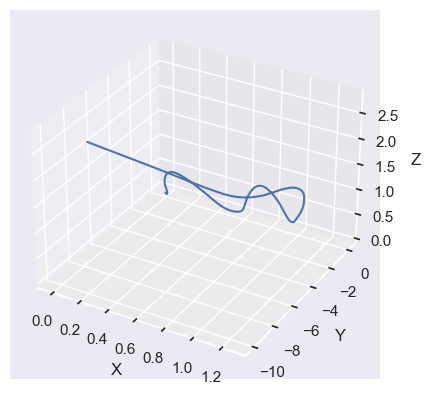

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/activities/testing.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df = df.resample('0.01S').mean()

columns_to_predict_locus = ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']
df = df[columns_to_predict_locus]

acceleration = df[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']].values
gyroscope = df[['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values

df = df.dropna()

linear_acceleration = df[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']].values
gyroscope = df[['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values

velocity = np.zeros_like(linear_acceleration)
position = np.zeros_like(linear_acceleration)

# 积分计算速度和位移
for i in range(1, len(df)):
    dt = (df.index[i] - df.index[i-1]).total_seconds()
    velocity[i] = velocity[i-1] + linear_acceleration[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

# 设置seaborn样式
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = position[:, 0]
y = position[:, 1]
z = position[:, 2]

# 绘制轨迹
ax.plot(x, y, z)

# 设置图形参数
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

In [15]:
import os
import csv

folder_path = '/Users/young/Downloads/falling/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, 'r') as file:
            csv_reader = csv.reader(file)
            row_count = sum(1 for row in csv_reader)

        print(f"file '{file_name}' has {row_count} rows")

file 'Brightness.csv' has 68 rows
file 'Annotation.csv' has 0 rows
file 'Barometer.csv' has 64 rows
file 'Orientation.csv' has 6802 rows
file 'Magnetometer.csv' has 6802 rows
file 'GyroscopeUncalibrated.csv' has 6802 rows
file 'MagnetometerUncalibrated.csv' has 6802 rows
file 'Accelerometer.csv' has 6802 rows
file 'Microphone.csv' has 670 rows
file 'AccelerometerUncalibrated.csv' has 6802 rows
file 'Gyroscope.csv' has 6802 rows
file 'Metadata.csv' has 2 rows
file 'Gravity.csv' has 6802 rows


In [16]:
df3 = pd.read_csv('/Users/young/Downloads/ml4qs_codes/Python3Code/intermediate_datafiles/chapter2_result.csv')
df3

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
0,2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.0410
1,2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.1320
2,2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.2820
3,2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.3690
4,2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31833,2016-02-08 20:41:03.906222395,-0.163020,0.184061,9.609571,NaN,NaN,NaN,-0.008592,0.021347,0.002082,...,0,0,NaN,-69.600000,27.660000,-10.533333,NaN,NaN,NaN,NaN
31834,2016-02-08 20:41:04.156222395,-0.162686,0.185196,9.611863,NaN,NaN,NaN,-0.008745,0.021294,0.002000,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0085
31835,2016-02-08 20:41:04.406222395,-0.159980,0.186800,9.615020,NaN,NaN,NaN,-0.008480,0.020960,0.002200,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0760
31836,2016-02-08 20:41:04.656222395,-0.158882,0.184333,9.613510,NaN,NaN,NaN,-0.008529,0.020882,0.002314,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1010.8450


In [20]:
df4 = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/intermediate/raw.csv')
df4.columns

Index(['time', 'Accelerometer z', 'Accelerometer y', 'Accelerometer x',
       'Gravity z', 'Gravity y', 'Gravity x', 'Gyroscope z', 'Gyroscope y',
       'Gyroscope x', 'Location bearingAccuracy', 'Location speedAccuracy',
       'Location verticalAccuracy', 'Location horizontalAccuracy',
       'Location speed', 'Location bearing', 'Location altitude',
       'Location longitude', 'Location latitude', 'Magnetometer z',
       'Magnetometer y', 'Magnetometer x', 'Microphone dBFS', 'Orientation qz',
       'Orientation qy', 'Orientation qx', 'Orientation qw',
       'Orientation roll', 'Orientation pitch', 'Orientation yaw',
       'label ontable'],
      dtype='object')

In [19]:
df5 = pd.read_csv('/Users/young/Downloads/ml4qs_codes/Python3Code/intermediate_datafiles/chapter3_result_outliers.csv')
df5.columns

Index(['Unnamed: 0', 'acc_phone_x', 'acc_phone_y', 'acc_phone_z',
       'acc_watch_x', 'acc_watch_y', 'acc_watch_z', 'gyr_phone_x',
       'gyr_phone_y', 'gyr_phone_z', 'gyr_watch_x', 'gyr_watch_y',
       'gyr_watch_z', 'hr_watch_rate', 'labelOnTable', 'labelSitting',
       'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving',
       'labelEating', 'labelRunning', 'light_phone_lux', 'mag_phone_x',
       'mag_phone_y', 'mag_phone_z', 'mag_watch_x', 'mag_watch_y',
       'mag_watch_z', 'press_phone_pressure'],
      dtype='object')

In [21]:
df6 = pd.read_csv('/Users/young/Downloads/ml4qs_codes/Python3Code/intermediate_datafiles/chapter2_result.csv')
df6.columns

Index(['Unnamed: 0', 'acc_phone_x', 'acc_phone_y', 'acc_phone_z',
       'acc_watch_x', 'acc_watch_y', 'acc_watch_z', 'gyr_phone_x',
       'gyr_phone_y', 'gyr_phone_z', 'gyr_watch_x', 'gyr_watch_y',
       'gyr_watch_z', 'hr_watch_rate', 'labelOnTable', 'labelSitting',
       'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving',
       'labelEating', 'labelRunning', 'light_phone_lux', 'mag_phone_x',
       'mag_phone_y', 'mag_phone_z', 'mag_watch_x', 'mag_watch_y',
       'mag_watch_z', 'press_phone_pressure'],
      dtype='object')

InvalidIndexError: (slice(None, None, None), None)

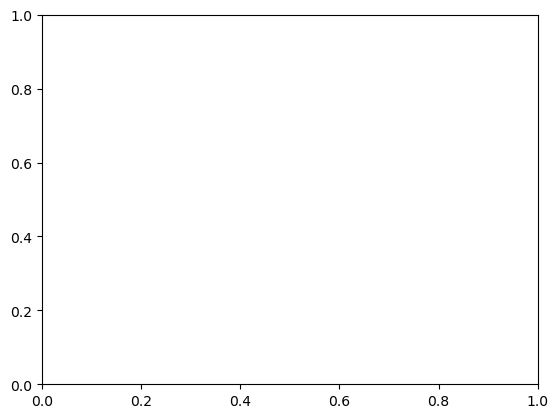

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

from sklearn.decomposition import PCA

df = pd.DataFrame(np.arange(0, 1, 0.001), columns=list('X'))

mean = 0.5
sd = 0.1
p = pd.DataFrame(norm.pdf(df,mean,sd), columns=list('p'))
plt.plot(df, p)

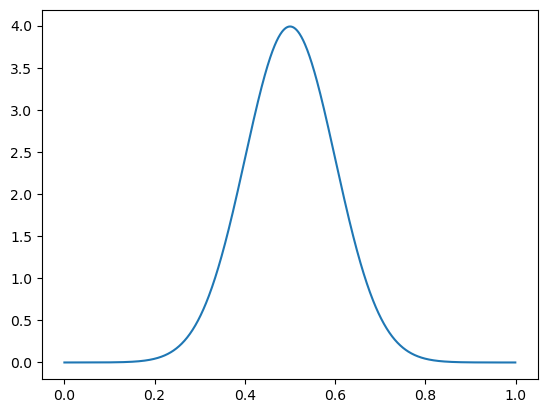

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.decomposition import PCA

np.random.seed(0)

# Figure 3.1

df = pd.DataFrame(np.arange(0, 1, 0.001), columns=list('X'))

mean = 0.5
sd = 0.1
p = pd.DataFrame(norm.pdf(df,mean,sd), columns=list('p'))
plt.plot(df.values, p.values)

In [30]:
df_outliers = pd.read_csv('/Users/young/Downloads/ml4qs_codes/Python3Code/intermediate_datafiles/chapter3_result_outliers.csv')
df_outliers

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
0,2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.0410
1,2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.1320
2,2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.2820
3,2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.3690
4,2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31833,2016-02-08 20:41:03.906222395,-0.163020,0.184061,9.609571,NaN,NaN,NaN,-0.008592,0.021347,0.002082,...,0,0,NaN,-69.600000,27.660000,-10.533333,NaN,NaN,NaN,NaN
31834,2016-02-08 20:41:04.156222395,-0.162686,0.185196,9.611863,NaN,NaN,NaN,-0.008745,0.021294,0.002000,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0085
31835,2016-02-08 20:41:04.406222395,-0.159980,0.186800,9.615020,NaN,NaN,NaN,-0.008480,0.020960,0.002200,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0760
31836,2016-02-08 20:41:04.656222395,-0.158882,0.184333,9.613510,NaN,NaN,NaN,-0.008529,0.020882,0.002314,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1010.8450


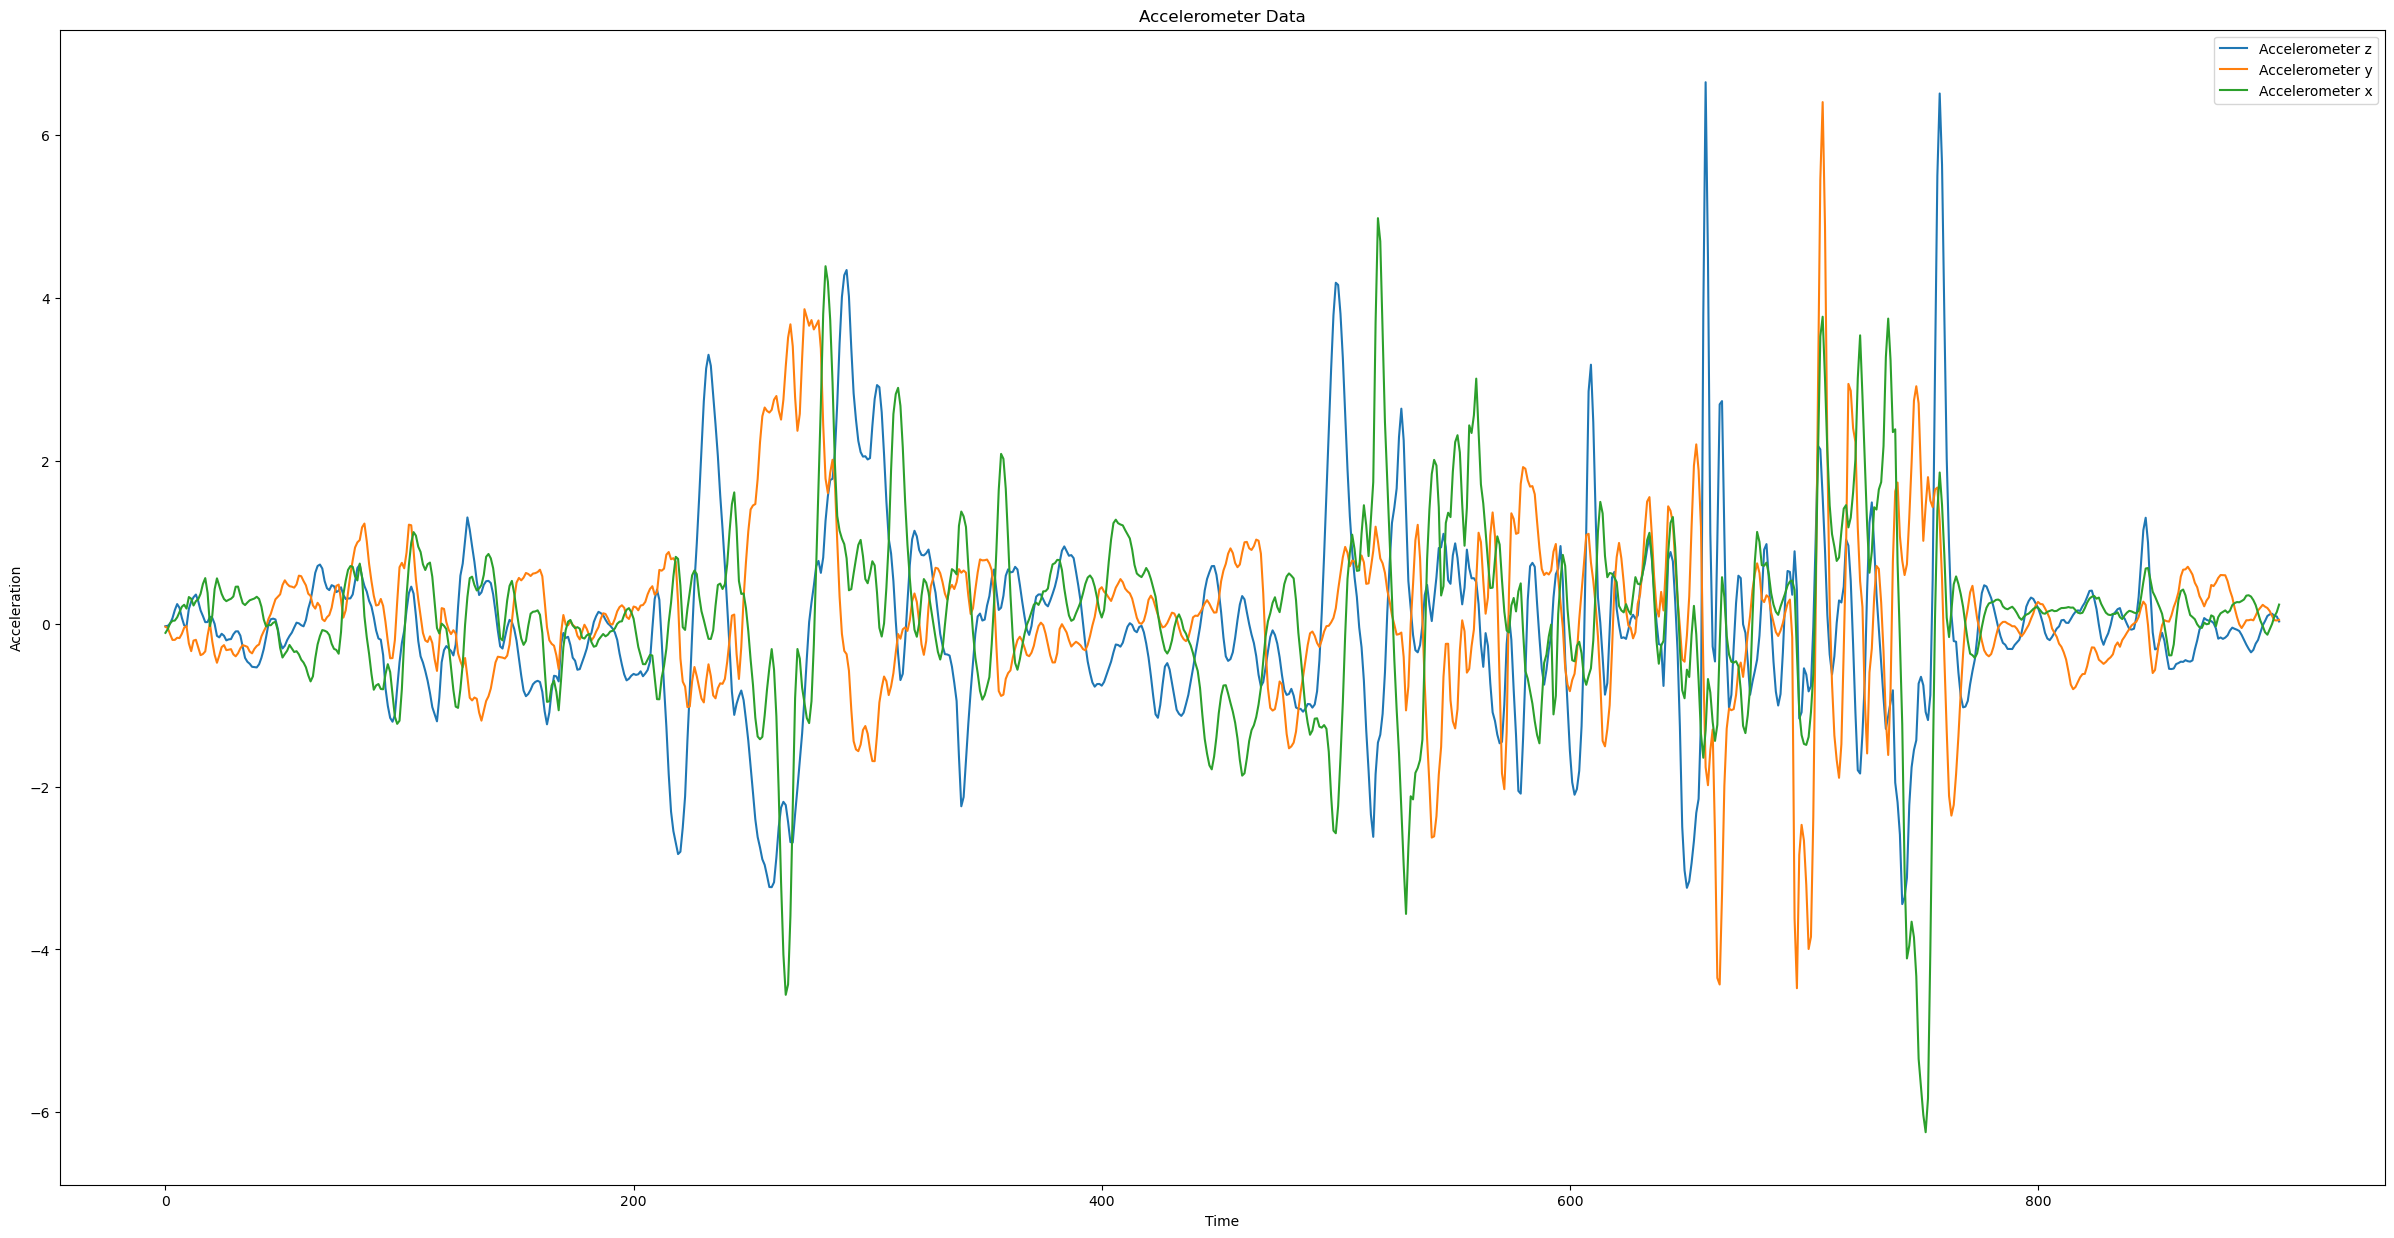

In [98]:
import pandas as pd
from src.outlier.outliers_finder import DistributionBasedOutlierDetection
from src.outlier.outliers_finder import DistanceBasedOutlierDetection
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import argparse

outlier_columns = ['acc_phone_x', 'light_phone_lux']
# Create the outlier classes.
OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()
#chose one of the outlier methods: chauvenet, mixture, distance or LOF via the argument parser at the bottom of this page.

DATA_PATH = Path('datasets/activities')
DATASET_FNAME = 'sitting.csv'

dataset = pd.read_csv(Path(DATA_PATH / DATASET_FNAME), index_col=0).head(1000)
dataset = dataset.dropna(subset=['Accelerometer z', 'Accelerometer y', 'Accelerometer x'])
dataset.index = pd.to_datetime(dataset.index)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30, 15))
# 将列数据转换为NumPy数组
accel_z = np.array(dataset['Accelerometer z'])
accel_y = np.array(dataset['Accelerometer y'])
accel_x = np.array(dataset['Accelerometer x'])

# 重置索引为从0开始的递增整数索引
dataset_reset = dataset.reset_index()
time = np.arange(len(dataset_reset))  # 使用新索引

# 绘制折线图
plt.plot(time, accel_z, label='Accelerometer z')
plt.plot(time, accel_y, label='Accelerometer y')
plt.plot(time, accel_x, label='Accelerometer x')

# 添加标题和标签
plt.title('Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [104]:
for col in outlier_columns:

    print(f"Applying Chauvenet outlier criteria for column {col}")

    # And try out all different approaches. Note that we have done some optimization
    # of the parameter values for each of the approaches by visual inspection.
    dataset = OutlierDistr.chauvenet(dataset, col, 2)

dataset[dataset['Accelerometer z_outlier'] == True]

Applying Chauvenet outlier criteria for column Accelerometer z
Applying Chauvenet outlier criteria for column Accelerometer y
Applying Chauvenet outlier criteria for column Accelerometer x


,Accelerometer z,Accelerometer y,Accelerometer x,Gravity z,Gravity y,Gravity x,Gyroscope z,Gyroscope y,Gyroscope x,Location altitude,...,Orientation qx,Orientation qz,Orientation roll,Orientation qw,Orientation qy,Orientation pitch,label sitting,Accelerometer z_outlier,Accelerometer y_outlier,Accelerometer x_outlier
time,,,,,,,,,,,,,,,,,,,,,
2023-06-10 07:29:39.687644200,4.281690,-0.332461,0.979097,4.815079,4.796898,7.069310,-2.028970,-0.372063,1.766849,NaN,...,0.862685,-0.405379,2.168741,-0.300278,-0.035700,-0.511112,1,True,False,False
2023-06-10 07:29:39.697591300,4.345834,-0.372593,0.805738,4.703949,5.015250,6.992178,-2.131356,-0.654349,1.319556,NaN,...,0.859644,-0.404173,2.162995,-0.311142,-0.029108,-0.536828,1,True,False,False
2023-06-10 07:29:41.776483600,4.189361,0.191560,-2.572646,-2.351811,0.815800,9.485453,-1.640689,0.749825,0.225848,NaN,...,0.595085,-0.739546,1.327759,-0.270150,-0.161137,-0.083285,1,True,False,False
2023-06-10 07:29:41.786430700,4.162525,0.417937,-2.238701,-2.267964,0.978930,9.490438,-1.842877,1.037912,-0.076460,NaN,...,0.599674,-0.734497,1.336222,-0.275950,-0.157344,-0.099990,1,True,False,False
2023-06-10 07:29:43.348089600,6.652472,-1.760518,-1.308478,6.300907,4.736061,5.834267,1.359961,2.039805,-0.080323,NaN,...,0.894622,-0.366554,2.394629,-0.210669,0.144597,-0.504014,1,True,False,False
2023-06-10 07:29:43.358036700,4.486867,-1.982409,-0.678331,6.440418,4.644760,5.754786,1.399764,2.351485,-0.196601,NaN,...,0.899878,-0.357718,2.412357,-0.208968,0.136340,-0.493412,1,True,False,False
2023-06-10 07:29:44.332828200,5.502299,1.673596,1.387635,9.098741,3.282252,1.615592,0.223431,1.820422,0.364126,NaN,...,0.967430,-0.111718,2.965862,-0.153664,0.167292,-0.341283,1,True,False,False
2023-06-10 07:29:44.342774800,6.513896,1.258263,1.858704,9.107374,3.314962,1.495722,0.249416,1.008017,0.435358,NaN,...,0.968079,-0.105446,2.978814,-0.156635,0.164836,-0.344825,1,True,False,False
2023-06-10 07:29:44.352722000,5.638149,0.550224,1.459029,9.102351,3.352474,1.441696,0.281831,0.430953,0.478644,NaN,...,0.968296,-0.102685,2.984510,-0.159264,0.162771,-0.348892,1,True,False,False


In [108]:
from src.util.VisualizeDataset import VisualizeDataset
outlier_columns = ['Accelerometer z', 'Accelerometer y', 'Accelerometer x']
DataViz = VisualizeDataset()
for col in outlier_columns:

    print(f"Applying Chauvenet outlier criteria for column {col}")

    # And try out all different approaches. Note that we have done some optimization
    # of the parameter values for each of the approaches by visual inspection.
    dataset = OutlierDistr.chauvenet(dataset, col, 2)
    # DataViz.plot_binary_outliers(
    #     dataset, col, col + '_outlier')

plt.figure(figsize=(30, 15))
# 将列数据转换为NumPy数组
accel_z = np.array(dataset['Accelerometer z'])
accel_y = np.array(dataset['Accelerometer y'])
accel_x = np.array(dataset['Accelerometer x'])
accel_z_outlier = np.array(dataset[dataset['Accelerometer z_outlier']==True]['Accelerometer z'])
accel_y_outlier = np.array(dataset[dataset['Accelerometer y_outlier']==True]['Accelerometer y'])
accel_x_outlier = np.array(dataset[dataset['Accelerometer x_outlier']==True]['Accelerometer x'])

# 重置索引为从0开始的递增整数索引
dataset_reset = dataset.reset_index()
time = np.arange(len(dataset_reset))  # 使用新索引

# 绘制折线图
plt.plot(time, accel_z, label='Accelerometer z')
plt.plot(time, accel_y, label='Accelerometer y')
plt.plot(time, accel_x, label='Accelerometer x')
plt.plot(time, accel_z_outlier, label='Accelerometer z_outlier')
plt.plot(time, accel_y_outlier, label='Accelerometer y_outlier')
plt.plot(time, accel_x_outlier, label='Accelerometer x_outlier')

# 添加标题和标签
plt.title('Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# 显示图例
plt.legend()

# 显示图形
plt.show()
dataset[dataset['Accelerometer z_outlier']==True]['Accelerometer z']

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as mpl

mpl.use('tkagg')
def plot_binary_outliers(self, data_table, col, outlier_col):
    data_table.loc[:,:] = data_table.dropna(axis=0, subset=[col, outlier_col])
    data_table.loc[:,outlier_col] = data_table[outlier_col].astype('bool')
    f, xar = plt.subplots()
    xfmt = md.DateFormatter('%H:%M')
    xar.xaxis.set_major_formatter(xfmt)
    plt.xlabel('time')
    plt.ylabel('value')
    # Plot data points that are outliers in red, and non outliers in blue.
    xar.plot(data_table.index[data_table[outlier_col]], data_table[col][data_table[outlier_col]], 'r+')
    xar.plot(data_table.index[~data_table[outlier_col]], data_table[col][~data_table[outlier_col]], 'b+')
    plt.legend(['outlier ' + col, 'no_outlier_' + col], numpoints=1, fontsize='xx-small', loc='upper center',  ncol=2, fancybox=True, shadow=True)
    self.save(plt)
    plt.show()

ImportError: cannot import name '_Mode' from 'matplotlib.backend_bases' (/Users/young/miniforge3/envs/ml4qs/lib/python3.8/site-packages/matplotlib/backend_bases.py)

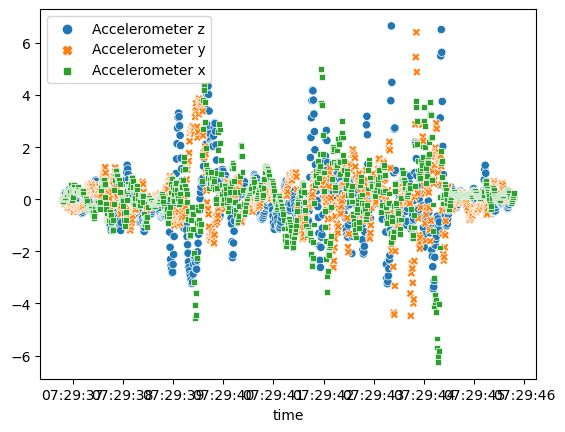

In [111]:
sns.scatterplot(dataset[['Accelerometer z', 'Accelerometer y', 'Accelerometer x']])

In [112]:
dataset['Accelerometer x_outlier']=dataset[dataset['Accelerometer x_outlier']==True]['Accelerometer x']
dataset['Accelerometer y_outlier']=dataset[dataset['Accelerometer y_outlier']==True]['Accelerometer y']
dataset['Accelerometer z_outlier']=dataset[dataset['Accelerometer z_outlier']==True]['Accelerometer z']

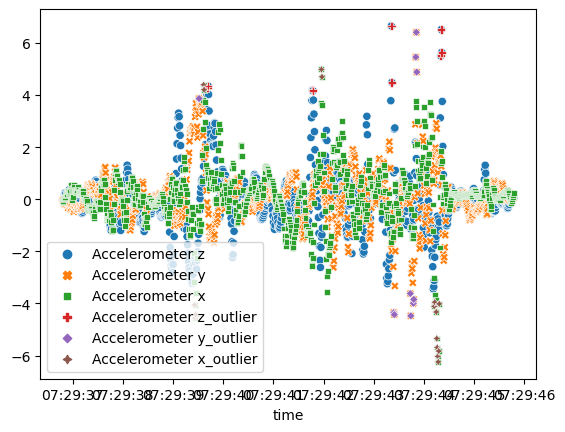

In [115]:
sns.scatterplot(dataset[['Accelerometer z', 'Accelerometer y', 'Accelerometer x', 'Accelerometer z_outlier', 'Accelerometer y_outlier', 'Accelerometer x_outlier']])

In [1]:
import pandas as pd
df = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/intermediate/raw_100ms.csv')
df

,Unnamed: 0.3,time,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Accelerometer z,Accelerometer y,Accelerometer x,Gravity z,Gravity y,...,Orientation roll outlier,Orientation qw outlier,Orientation qy outlier,Accelerometer z kalman,Accelerometer y kalman,Accelerometer x kalman,label sitting,label ontable,label standing,label playing_phone
0,0,1686325290300000000,33.5,106.5,106.5,0.056665,-0.009327,0.003532,8.729403,4.468223,...,0.0,0.0,0.279412,0.057537,-0.009392,0.003917,0.0,1.0,0.0,0.0
1,1,1686325290400000000,102.5,175.5,175.5,-0.045179,0.018364,-0.021145,8.731245,4.464794,...,0.0,0.0,0.285714,-0.045174,0.018463,-0.021219,0.0,1.0,0.0,0.0
2,2,1686325290500000000,173.0,246.0,246.0,-0.012386,0.014465,-0.035666,8.729885,4.467471,...,0.0,0.0,0.211268,-0.013446,0.014656,-0.035937,0.0,1.0,0.0,0.0
3,3,1686325290600000000,243.5,316.5,316.5,0.019626,0.008062,-0.012273,8.736309,4.454952,...,0.0,0.0,0.000000,0.019719,0.007450,-0.012109,0.0,1.0,0.0,0.0
4,4,1686325290700000000,313.5,386.5,386.5,-0.023795,-0.009974,0.044133,8.737652,4.452373,...,0.0,0.0,0.000000,-0.023881,-0.009363,0.043531,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54563,54563,1686384008800000000,202235.5,202239.5,202239.5,-0.143556,0.293371,0.209207,-8.402202,-4.965805,...,1.0,1.0,1.000000,-0.184903,0.342791,0.219507,1.0,0.0,0.0,0.0
54564,54564,1686384008900000000,202245.5,202249.5,202249.5,-0.532423,0.257533,0.320376,-8.501049,-4.822437,...,1.0,1.0,1.000000,-0.499701,0.244369,0.326379,1.0,0.0,0.0,0.0
54565,54565,1686384009000000000,202255.5,202259.5,202259.5,-0.393921,0.438450,0.007533,-8.402765,-5.034284,...,1.0,1.0,1.000000,-0.404588,0.444067,0.010879,1.0,0.0,0.0,0.0
54566,54566,1686384009100000000,202265.5,202269.5,202269.5,0.157597,-0.079128,0.404878,-8.274464,-5.250604,...,1.0,1.0,1.000000,0.137214,-0.064614,0.394811,1.0,0.0,0.0,0.0


,Unnamed: 0,time,Accelerometer z,Accelerometer y,Accelerometer x,Gravity z,Gravity y,Gravity x,Gyroscope z,Gyroscope y,...,Magnetometer z outlier,Magnetometer y outlier,Magnetometer x outlier,Microphone dBFS outlier,Orientation yaw outlier,Orientation qx outlier,Orientation qz outlier,Orientation roll outlier,Orientation qw outlier,Orientation qy outlier
0,0,1686343321893000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
1,1,1686343321993000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
2,2,1686343322093000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
3,3,1686343322130815000,-0.037934,0.013564,-0.014809,-0.514528,-9.738211,-1.035797,0.004663,0.020041,...,False,False,False,False,False,False,False,False,False,False
4,4,1686343322140833000,-0.053990,-0.007654,0.006238,-0.513435,-9.738243,-1.036044,0.001122,0.010325,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53908,53908,1686343832258248700,0.048594,-0.079901,-0.015671,-0.003554,-9.779421,-0.730273,-0.017388,0.007146,...,False,False,False,False,False,False,False,False,False,False
53909,53909,1686343832282000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
53910,53910,1686343832382000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
53911,53911,1686343832483000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [6]:
import pandas as pd
dataset = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/upstairs/upstairs2-2023-06-10_20-20-59/Location.csv')
dataset['time'][1] - dataset['time'][0]

9000000000

In [14]:
dataset = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/intermediate/after_impute_missing_values/ch3_2_after_missing_values_imputation.csv')
dataset

,time,acc_z,acc_y,acc_x,gra_z,gra_y,gra_x,gyr_z,gyr_y,gyr_x,...,ori_qy,ori_qx,ori_qw,label_cycling,label_downstairs,label_playing_phone,label_running,label_standing,label_upstairs,label_walking
0,1686330339300000000,0.464217,0.369930,0.012153,-7.716613,-5.409215,2.688058,-0.159732,1.590491,-0.057156,...,-0.174551,-0.275031,-0.940081,1,0,0,0,0,0,0
1,1686330339400000000,-0.303494,0.089009,0.036266,-7.501080,-5.144485,3.656581,0.405885,1.361791,-0.315329,...,-0.235047,-0.249029,-0.930359,1,0,0,0,0,0,0
2,1686330339500000000,1.434745,0.059475,-0.483970,-7.141923,-5.105509,4.363639,0.253668,0.967901,-0.857588,...,-0.285263,-0.232879,-0.914693,1,0,0,0,0,0,0
3,1686330339600000000,0.167647,0.553322,0.368927,-7.253018,-4.302193,4.997137,0.328549,1.340458,-1.053776,...,-0.316457,-0.172234,-0.911659,1,0,0,0,0,0,0
4,1686330339700000000,-0.816225,0.728859,0.488496,-6.723400,-3.945992,5.939202,0.379467,1.602024,-0.349117,...,-0.375221,-0.126458,-0.886928,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,1686426403000000000,1.431945,1.026038,0.936424,-8.112111,-5.335646,-1.363101,0.250802,0.054224,0.633650,...,0.255731,-0.144582,-0.661600,0,0,0,0,0,0,1
34580,1686426403100000000,1.348141,0.371618,0.053597,-7.751179,-5.826313,-1.455043,0.154863,-0.145991,0.535156,...,0.279077,-0.163875,-0.662474,0,0,0,0,0,0,1
34581,1686426403200000000,-0.327166,-0.522032,-0.486250,-7.470490,-6.178591,-1.473894,0.065235,0.258198,0.371151,...,0.293776,-0.180992,-0.664230,0,0,0,0,0,0,1
34582,1686426403300000000,-1.627978,-0.855141,0.848426,-7.332591,-6.381828,-1.293014,-0.084170,0.000423,0.180748,...,0.295958,-0.196323,-0.661146,0,0,0,0,0,0,1


In [19]:
dataset = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/intermediate/raw_100ms.csv')
dataset
dataset['time'][1] - dataset['time'][0]
dataset

,time,acc_z,acc_y,acc_x,gra_z,gra_y,gra_x,gyr_z,gyr_y,gyr_x,...,ori_qy,ori_qx,ori_qw,label_cycling,label_downstairs,label_playing_phone,label_running,label_standing,label_upstairs,label_walking
0,1686330338700000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
1,1686330338800000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
2,1686330338900000000,0.273308,-0.095423,-0.245486,-8.066225,-5.543999,0.604197,-0.196691,0.339125,-0.355597,...,-0.072108,-0.289004,-0.945791,1,0,0,0,0,0,0
3,1686330339000000000,0.083668,-0.276546,-0.103430,-8.274083,-5.214991,0.687289,-0.281765,-0.099196,-0.588189,...,-0.070843,-0.270230,-0.952606,1,0,0,0,0,0,0
4,1686330339100000000,-0.706107,-0.006622,0.067771,-8.482525,-4.876457,0.658420,0.010575,0.092206,0.000807,...,-0.064018,-0.251793,-0.959302,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34654,1686640194300000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
34655,1686640194400000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
34656,1686640194500000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
34657,1686640194600000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0


In [18]:
import pandas as pd

dataset = pd.read_csv('/Users/young/Downloads/ml4qs_codes/ML4QS_66/datasets/intermediate/chapter4_result.csv')
# print(dataset['ori_qw_freq_4.9_Hz_ws_100'])
dataset

,time,acc_z,acc_y,acc_x,gra_z,gra_y,gra_x,gyr_z,gyr_y,gyr_x,...,ori_qw_freq_4.1_Hz_ws_100,ori_qw_freq_4.2_Hz_ws_100,ori_qw_freq_4.3_Hz_ws_100,ori_qw_freq_4.4_Hz_ws_100,ori_qw_freq_4.5_Hz_ws_100,ori_qw_freq_4.6_Hz_ws_100,ori_qw_freq_4.7_Hz_ws_100,ori_qw_freq_4.8_Hz_ws_100,ori_qw_freq_4.9_Hz_ws_100,ori_qw_freq_5.0_Hz_ws_100
0,2023-06-09 17:05:39.300,0.464217,0.369930,0.012153,-7.716613,-5.409215,2.688058,-0.159732,1.590491,-0.057156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-09 17:05:42.200,0.270074,5.970487,-0.253360,1.143448,9.708167,0.559534,-1.748247,-0.167662,-0.380162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-09 17:05:45.100,0.141057,-0.286982,-1.096114,1.377106,9.687186,-0.647942,0.341653,-0.351144,-0.068587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-09 17:05:48.000,-1.476996,-0.547845,-0.832283,2.108870,9.570603,-0.348312,-0.000700,0.296440,-0.150136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-06-09 17:05:50.900,0.017103,-0.359511,0.899038,1.761998,9.634963,-0.475668,0.204220,-0.188495,0.153961,...,-0.120125,-0.058700,-0.142244,-0.121193,-0.136798,-0.117081,-0.169062,-0.146979,-0.155344,-0.175621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2023-06-13 07:09:41.600,0.069683,-0.942809,1.171358,-2.274159,-9.268781,-2.249138,0.299911,-1.393564,-0.168358,...,0.218587,0.163031,0.146270,0.169291,0.185705,0.180968,0.170434,0.173881,0.206269,0.219076
1189,2023-06-13 07:09:44.500,-5.100368,-6.346430,-3.554486,-3.751320,-8.887347,-1.733484,-0.195417,-1.652576,-0.986566,...,0.082622,0.062234,0.072317,0.081108,0.034928,0.037076,0.047527,0.075272,0.163283,0.128088
1190,2023-06-13 07:09:47.400,-1.134494,-2.475160,-1.518557,0.510178,-9.695627,-0.861867,1.024531,0.064317,-3.344209,...,0.143230,0.160467,0.170468,0.185566,0.203266,0.230440,0.194870,0.103143,0.295631,0.109700
1191,2023-06-13 07:09:50.300,-0.134587,0.680601,-0.752485,-1.233895,-9.706469,-0.404942,-0.589808,0.146152,1.756190,...,0.153583,0.194115,0.136633,0.110720,0.306730,0.240248,0.061851,0.075782,0.282962,0.138324


In [12]:
dataset = pd.read_csv('/Users/young/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/1258ea5eacbd32ce97de5d713cc2b054/Message/MessageTemp/a48bd50eb444f76d37a112a024ac26e2/File/chapter3_result_final.csv')
dataset

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,mag_watch_y,mag_watch_z,press_phone_pressure,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,2016-02-08 18:28:25.656222395,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,...,58.998207,-23.318370,1029.04100,-0.138962,0.675065,-0.020069,-0.084507,0.244687,-0.080529,0.053671
1,2016-02-08 18:28:25.906222395,-0.096204,0.168119,9.632371,9.551758,0.189616,1.514936,-0.008766,0.018608,-0.001691,...,58.959727,-23.886958,1029.13200,-0.142551,0.679169,-0.022941,-0.084407,0.244757,-0.081987,0.055416
2,2016-02-08 18:28:26.156222395,-0.091631,0.166526,9.636167,9.551339,0.194102,1.511228,-0.008963,0.018207,-0.002332,...,58.133900,-25.272319,1029.28200,-0.148400,0.683118,-0.027784,-0.086870,0.244484,-0.083694,0.053934
3,2016-02-08 18:28:26.406222395,-0.087132,0.167139,9.633979,9.550147,0.200357,1.504115,-0.008844,0.018436,-0.002050,...,58.255560,-24.346528,1029.36900,-0.151896,0.684830,-0.028696,-0.087882,0.245116,-0.081579,0.053161
4,2016-02-08 18:28:26.656222395,-0.093228,0.166913,9.628586,9.552066,0.200733,1.501253,-0.008886,0.018699,-0.002256,...,59.248007,-23.400963,1029.26800,-0.148518,0.683540,-0.028142,-0.086783,0.246322,-0.079872,0.054975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31833,2016-02-08 20:41:03.906222395,-0.162021,0.183981,9.610694,-5.261667,-5.561800,7.313867,-0.008600,0.021403,0.002039,...,8.125000,-38.250000,1011.02275,0.547497,-0.017961,-0.105356,-0.318612,-0.203828,-0.054129,-0.103951
31834,2016-02-08 20:41:04.156222395,-0.162810,0.185584,9.611845,-5.261667,-5.561800,7.313867,-0.008668,0.021285,0.002012,...,8.125000,-38.250000,1011.00850,0.548084,-0.018241,-0.105020,-0.318367,-0.203938,-0.054194,-0.103860
31835,2016-02-08 20:41:04.406222395,-0.160333,0.186314,9.614440,-5.261667,-5.561800,7.313867,-0.008577,0.020943,0.002204,...,8.125000,-38.250000,1011.07600,0.545614,-0.017164,-0.105110,-0.318736,-0.204194,-0.054279,-0.104275
31836,2016-02-08 20:41:04.656222395,-0.158529,0.184669,9.614019,-5.261667,-5.561800,7.313867,-0.008463,0.020901,0.002311,...,8.125000,-38.250000,1010.84500,0.554012,-0.020147,-0.105922,-0.318150,-0.202847,-0.053749,-0.102894


In [20]:
dataset = pd.read_csv('/Users/young/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/1258ea5eacbd32ce97de5d713cc2b054/Message/MessageTemp/a48bd50eb444f76d37a112a024ac26e2/File/chapter4_result.csv')
dataset

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,mag_watch_z_freq_1.1_Hz_ws_40,mag_watch_z_freq_1.2_Hz_ws_40,mag_watch_z_freq_1.3_Hz_ws_40,mag_watch_z_freq_1.4_Hz_ws_40,mag_watch_z_freq_1.5_Hz_ws_40,mag_watch_z_freq_1.6_Hz_ws_40,mag_watch_z_freq_1.7_Hz_ws_40,mag_watch_z_freq_1.8_Hz_ws_40,mag_watch_z_freq_1.9_Hz_ws_40,mag_watch_z_freq_2.0_Hz_ws_40
0,2016-02-08 18:28:25.656222395,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-08 18:28:28.406222395,-0.088630,0.170400,9.628089,9.551315,0.197073,1.505779,-0.008870,0.018457,-0.000912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-08 18:28:31.156222395,-0.084584,0.171914,9.620668,9.552778,0.194151,1.509347,-0.008438,0.018855,0.000159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-08 18:28:33.906222395,-0.081381,0.170345,9.634230,9.546574,0.200030,1.507089,-0.008650,0.018903,-0.003626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-08 18:28:36.656222395,-0.097313,0.136100,9.623921,9.545983,0.197746,1.516108,-0.011363,0.015230,-0.023521,...,1.932933e+00,-1.187140e+00,1.130804e+00,-4.046004e-01,1.012557e+00,1.166098e+00,5.130568e-01,3.791358e-01,3.274394e-01,3.076108e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2016-02-08 20:40:53.156222395,-0.163787,0.183251,9.611648,-5.261667,-5.561800,7.313867,-0.008054,0.020805,0.001829,...,-7.482015e-12,-1.768541e-11,-2.368949e-11,-5.366019e-11,4.573053e-11,-1.072635e-10,1.732303e-10,1.546141e-11,1.979608e-10,-3.193179e-11
2891,2016-02-08 20:40:55.906222395,-0.163480,0.184232,9.614230,-5.261667,-5.561800,7.313867,-0.008538,0.021053,0.001998,...,-6.544099e-12,-6.053824e-12,1.762146e-12,4.050094e-12,1.415685e-10,1.304628e-10,1.175238e-11,-9.477930e-11,5.792344e-11,-6.590284e-12
2892,2016-02-08 20:40:58.656222395,-0.164780,0.184331,9.615484,-5.261667,-5.561800,7.313867,-0.008474,0.021411,0.002339,...,9.819701e-12,1.250555e-11,6.892265e-12,6.206591e-11,2.302372e-10,1.456613e-12,-1.783818e-10,8.991918e-12,-1.035971e-11,2.165557e-11
2893,2016-02-08 20:41:01.406222395,-0.162506,0.185287,9.608581,-5.261667,-5.561800,7.313867,-0.008452,0.021322,0.002050,...,9.414691e-12,1.092815e-11,9.784173e-12,-1.026734e-11,2.190887e-10,-2.845084e-10,1.601492e-10,-1.288925e-11,-1.060805e-10,2.583000e-11
